# Assignment
*  In this assignment, we will build a classifier for MNIST from scratch using just [NumPy](https://numpy.org/)

*  [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits of size 28x28

*  The dataset that you are expected to use for training is already uploaded along

*   Our model will have 1 hidden layer, like the one below (not our recommendation to use 256 in the hidden layer though, try various values out)

**Feel free to redefine any function signatures below, just make sure the final cell remains the same.**

<center>
<img src="https://user-images.githubusercontent.com/81357954/166119893-4ca347b8-b1a4-40b8-9e0a-2e92b5f164ae.png">
</center>

## Import libraries here
NumPy, Matplotlib, ...

Also remember to initialize the seed for reproducibility of results

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
np.random.seed(23)

# Load *Dataset*
Load data from the given pickle file

In [2]:

data_file='MNIST_data.pkl'
# load the data set
with open(data_file,'rb') as infile:
    train_dataset = pickle.load(infile)
X = train_dataset['X']
y = train_dataset['y']

# normalize
StandDev=np.std(X,axis=0,keepdims=True)
Mean=np.mean(X,axis=0,keepdims=True)
X_normalised=(X-Mean)/(StandDev+1e-7)
testsize=0.5
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=testsize, random_state=42)

# Split into X_train, y_train, X_test, y_test
# you can use stratified splitting from sklearn library


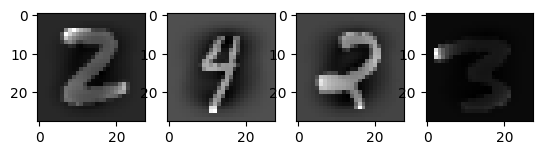

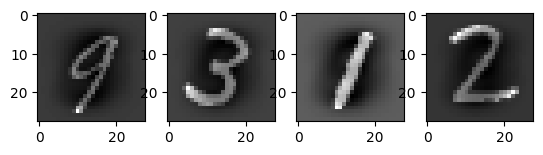

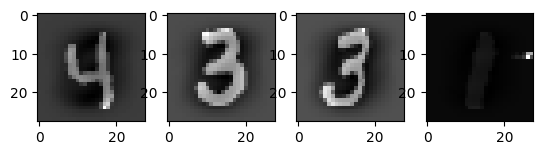

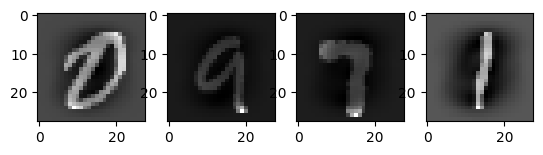

In [3]:

# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding label

for i in range(0,4):
    num_examples = 4
    seed = 1471979+i*2
    rng = np.random.default_rng(seed)

    fig, axes = plt.subplots(1, num_examples)
    for sample, ax in zip(rng.choice(X_train, size=num_examples, replace=False), axes):
        ax.imshow(sample.reshape(28, 28), cmap="gray")

## Building up parts of our classifier

**Activation functions**

In [4]:
def relu(z):
    """
    Arguments:
    z -- A scalar or numpy array.
    Return:
    relu func applied to each element of z
    """
    return np.maximum(0,z)

def softmax(x):
    """
    returns computed probabilitites for each element in batch separately
    input: (N, 10)
    output: (N, 10)
    """
    
    x = x - np.max(x,axis=1,keepdims=True)
    exp_x = np.exp(x)
    return exp_x / (np.sum(exp_x, axis=1, keepdims=True)+1e-7)

**Notes about the Neural Network** 
*   Input size is (784,) because 28x28 = 784
*   Output size will be 10, each element represeting probability of the image representing that digit
*   Size of the hidden layer is a hyperparameter



**Initialize the layers weights**

Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero. But you can try everything out :)

In [5]:
def init_params():
    """
    ideally it should take the size of all the layers and 
    should return the initialized weights.
    """
    input_size=784
    hidden_size=256
    output_size=10
    #learning_rate=1e-7
    w1=0.01*np.random.randn(input_size,hidden_size)
    w2=0.01*np.random.randn(hidden_size,output_size)
    bias1=np.zeros([hidden_size, 1])
    bias2=np.zeros([output_size, 1])
    return w1,w2,bias1,bias2,input_size,hidden_size,output_size

**Forward Propagation**

In [6]:
def forward_propg(X, w1,w2,bias1,bias2):
    """
    X: input data
    returns: logits, output of each layer z1,z2,a1,a2
    """

    z1=np.dot(X,w1)+bias1.T
    a1=relu(z1)
    z2=np.dot(a1,w2)+bias2.T
    a2=softmax(z2)
    return z1,z2,a1,a2
def relu_derivative(x):
    x[x<=0]=0
    x[x>0]=1
    return x 

**Backward Propagation**


You may use stochastic gradient descent or batch gradient descent here. Feel free to use any loss function.

In [7]:
def backward_propg(X, y,w1,w2,bias1,bias2,lr):
    """
    should update the weights and return updated weights
    
    """
    
    z1,z2,a1,a2=forward_propg(X,w1,w2,bias1,bias2)
    N=X.shape[0]
    grad_z2=a2/N
    for i in range(N):
        grad_z2[i][y[i]]-=1/N
        
    grad_bias2=np.sum(grad_z2,axis=0,keepdims=True).T
    grad_w2=a1.T@grad_z2
    grad_a1=grad_z2@w2.T
    grad_relu=grad_a1*(a1>0)
    grad_bias1=np.sum(grad_relu,axis=0,keepdims=True).T
    grad_w1=X.T@grad_relu
    w1-=lr*grad_w1
    w2-=lr*grad_w2
    bias1-=lr*grad_bias1
    bias2-=lr*grad_bias2
    return w1,bias1,w2,bias2

In [8]:

    
def cost_func(z2,a2,y):
    """
    calculate loss to check whether it is decreasing at each epoch or not
    one can return this in backward propagation as well
    """
    loss=0
    for i in range(np.size(z2,0)):
        loss+= -np.log(a2[i][y[i]])/(np.size(z2,0))
    return loss


## Integrate everything

In [9]:
def train(X, y, hidden_nodes, epochs,lr):
    """
    hidden_nodes: no. of nodes in hidden layer

    should return the updated optimize weights.
    """
    # initialize weights.
    
    w1,w2,bias1,bias2,input_size,hidden_size,output_size=init_params()
   
    relu_derivative 
    for i in range(epochs):
        # forward propagation
        z1,z2,a1,a2=forward_propg(X,w1,w2,bias1,bias2)
        loss=cost_func(z2,a2,y_train)
        #print cost at every 100 or so iterations
        w1,bias1,w2,bias2=backward_propg(X, y,w1,w2,bias1,bias2,lr)
        if i%25==0:
            print("Cost at 25th iteration %d:%f" % (i,loss))
        
        # backward propagation
    return w1,w2,bias1,bias2

In [10]:
def predict(X, w1,w2, bias1, bias2):
    """
    returns the prediction in [0,9] for each element in X
    """
    z1_test,z2_test,a1_test,a2_test=forward_propg(X,w1,w2,bias1,bias2)
    predictions=np.argmax(a2_test,axis=1)
    predictions = predictions.reshape([X.shape[0],1])
    print(predictions.shape)
    return predictions

In [11]:
def accuracy(pred, y):
    """
    prints % accuracy
    """
    acc=np.mean(pred==y)*100
    print("% Accuracy:",acc,"%")
    print(y.shape)
    return acc

### Save as pickle

In [12]:
import pickle
import random

roll_num = "22B1010" # enter ldap
hidden_dim = 256 # replace with your own hidden dimension
w1,w2,bias1,bias2=train(X_train, y_train, hidden_nodes=256, epochs=1000,lr=1)
pred=predict(X_test,w1,w2, bias1, bias2)
accuracy(pred, y_test)
model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': w1, # layer 0 weight (784, z)
    'layer_0_bias': bias1, # layer 0 bias (z, 1)
    'layer_1_wt': w2, # layer 1 weight (z, 10)
    'layer_1_bias': bias2 # layer 1 bias (10, 1)
}

assert model_dict['layer_0_wt'].shape == (784, hidden_dim)
assert model_dict['layer_0_bias'].shape == (hidden_dim, 1)
assert model_dict['layer_1_wt'].shape == (hidden_dim, 10)
assert model_dict['layer_1_bias'].shape == (10, 1)

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)

Cost at 25th iteration 0:2.304236
Cost at 25th iteration 25:0.239532
Cost at 25th iteration 50:0.169472
Cost at 25th iteration 75:0.133028
Cost at 25th iteration 100:0.108366
Cost at 25th iteration 125:0.090143
Cost at 25th iteration 150:0.075997
Cost at 25th iteration 175:0.064737
Cost at 25th iteration 200:0.055641
Cost at 25th iteration 225:0.048191
Cost at 25th iteration 250:0.042018
Cost at 25th iteration 275:0.036835
Cost at 25th iteration 300:0.032475
Cost at 25th iteration 325:0.028789
Cost at 25th iteration 350:0.025654
Cost at 25th iteration 375:0.022970
Cost at 25th iteration 400:0.020663
Cost at 25th iteration 425:0.018677
Cost at 25th iteration 450:0.016959
Cost at 25th iteration 475:0.015465
Cost at 25th iteration 500:0.014160
Cost at 25th iteration 525:0.013016
Cost at 25th iteration 550:0.012010
Cost at 25th iteration 575:0.011120
Cost at 25th iteration 600:0.010329
Cost at 25th iteration 625:0.009623
Cost at 25th iteration 650:0.008991
Cost at 25th iteration 675:0.0084